<a href="https://colab.research.google.com/github/KashyapCKotak/AI-ML-experiments/blob/master/Stock1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import all libraries
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Data/2015-02-02-To-2019-5-19-5-Min.csv', index_col = 0)
df_stock = dataset.copy()
df_stock = df_stock.dropna()
df_stock = df_stock[['Open', 'High', 'Low', 'Close']]

In [0]:
df_stock

In [0]:
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

                              Open      High       Low     Close
Time                                                            
2015-02-04T13:20:00+0530  0.180503  0.178966  0.181630  0.180622
2015-02-04T13:25:00+0530  0.180693  0.178966  0.182492  0.179551
2015-02-04T13:30:00+0530  0.179621  0.178517  0.182147  0.179239


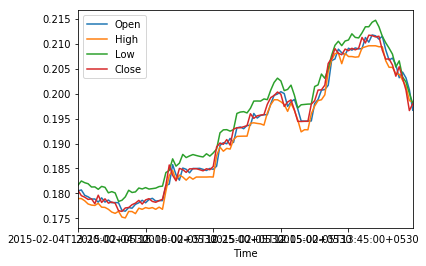

In [53]:
print(df_stock_norm[0:3])
df_stock_norm[:100].plot()
#plt.plot(df_stock_norm[:1000])
#plt.show()

In [0]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 
seq_len = 20 # taken sequence length as 20: 19 for training and 1 for target

In [0]:
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() 
    print(data_raw)
    data = [] 
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    data = np.array(data);
    print("data shape:",data.shape)
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    print("valid_set_size shape:",valid_set_size)
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    print("test_set_size shape:",test_set_size)
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    print("train_set_size shape:",train_set_size)
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [56]:
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

[[0.18050298 0.17896628 0.18163026 0.1806223 ]
 [0.18069311 0.17896628 0.18249156 0.17955056]
 [0.17962147 0.17851714 0.18214704 0.17923941]
 ...
 [0.50116671 0.4999309  0.50113691 0.50008643]
 [0.50021606 0.50407684 0.50251499 0.50630942]
 [0.50643851 0.50502695 0.50647695 0.50475367]]
data shape: (78985, 20, 4)
valid_set_size shape: 7898
test_set_size shape: 7898
train_set_size shape: 63189
x_train.shape =  (63189, 19, 4)
y_train.shape =  (63189, 4)
x_valid.shape =  (7898, 19, 4)
y_valid.shape =  (7898, 4)
x_test.shape =  (7898, 19, 4)
y_test.shape =  (7898, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [57]:
print(x_train[0:4])
print(y_train[0:4])

[[[0.18050298 0.17896628 0.18163026 0.1806223 ]
  [0.18069311 0.17896628 0.18249156 0.17955056]
  [0.17962147 0.17851714 0.18214704 0.17923941]
  [0.17931034 0.17787797 0.18194033 0.17878997]
  [0.17886095 0.1776534  0.18128574 0.17891098]
  [0.17887823 0.1775843  0.18130297 0.17792567]
  [0.1782387  0.17801617 0.18082064 0.17963699]
  [0.17910293 0.17723881 0.18140633 0.17818496]
  [0.17825598 0.17718698 0.18121684 0.17891098]
  [0.17867081 0.17680694 0.18011438 0.17804667]
  [0.17811771 0.17625415 0.18035554 0.17827139]
  [0.17816956 0.17599502 0.18009715 0.17804667]
  [0.17811771 0.17640962 0.17839179 0.1765255 ]
  [0.17659666 0.17525221 0.17861572 0.17638721]
  [0.17642382 0.17507946 0.17930476 0.17707865]
  [0.17714977 0.17637507 0.18063116 0.17716508]
  [0.17702878 0.17635779 0.18018328 0.17773552]
  [0.17780659 0.1759432  0.18030387 0.17804667]
  [0.17811771 0.17703151 0.18107903 0.17859983]]

 [[0.18069311 0.17896628 0.18249156 0.17955056]
  [0.17962147 0.17851714 0.18214704 0.

In [0]:
# parameters & Placeholders 
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

In [0]:
perm=[0,1]
x_train[perm]

In [0]:
# function to get the next batch
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size 
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        index_in_epoch = 0; #repeat the above steps
        start = index_in_epoch
        index_in_epoch += batch_size    
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

In [67]:
print(tf.__version__)

1.14.0


In [0]:
#RNN 
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
         for layer in range(n_layers)]
# LSTM  
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#        for layer in range(n_layers)]

#LSTM with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

#GRU 
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)] 
                                                                  
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
